# Mini Project Deep Learning (Testing)
Notebook By. Afif A. Iskandar

## Membuat klasifier citra untuk kasus MotoGP

- Kelompok : OAOE; Kelompok 3 
- TA : Bahrul
- Anggota : 
    * Ziyad
    * Stezar
    * Faisal
    * Nella
    * Nourma

## Tes CNN

In [36]:
# import library yang dibutuhkan
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from neural_net.myneuralnets import MyNeuralNets
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import os
import pickle
import matplotlib

In [37]:
%matplotlib inline

In [182]:
# Definisikan path dataset dan tempat menyimpan model
model_path = 'model/model6.h5'
labelbin = 'label/label6.pkl'
# model_path = 'model/model_motogp30.h5'# tempat menyimpan model
# labelbin = 'label/motogp30.pkl'
IMAGE_DIMS = (96, 96, 3)


### Prediksi

In [195]:
# Load Gambar
import matplotlib.image as mpimg
image_test = 'test/ped.jpg' #path ke test image
image_show = mpimg.imread(image_test)
image = load_img(image_test, target_size=IMAGE_DIMS[:2])

In [196]:
from keras.models import load_model
model = load_model(model_path)
lb = pickle.loads(open(labelbin, 'rb').read())

In [163]:
lb

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

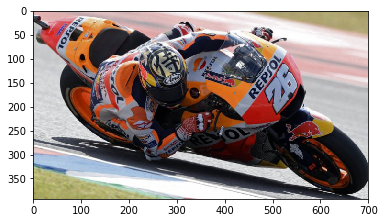

In [197]:
plt.imshow(image_show)

In [198]:
# pra proses
image = np.array(image, dtype="float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)


In [199]:
# klasifikasi input
print('[INFO] Mencari Kelas Gambar')
proba = model.predict(image)[0]
idx = np.argmax(proba)
label = lb.classes_[idx]

[INFO] Mencari Kelas Gambar


In [200]:
# prediksi label + confidence score
label = "{}: {:.2f}%".format(label, proba[idx] * 100)
print(label)

pedrosa: 97.34%
